In [111]:
import requests
import pandas as pd

def get_crypto_data(coin_id, days=365):
    
    url= f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
    params = {
        'vs_currency': 'usd',
        'days': 365,
        'interval': 'daily'}
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'prices'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df[['date', 'prices']]

# Fetch Bitcoin (BTC) and Ethereum (ETH) data
btc_df = get_crypto_data('bitcoin')
eth_df = get_crypto_data('ethereum')


In [115]:
print("Bitcoin Prices:")
print(btc_df.head())

Bitcoin Prices:
        date        prices
0 2024-05-30  67577.265590
1 2024-05-31  68372.492884
2 2024-06-01  67474.954837
3 2024-06-02  67704.326418
4 2024-06-03  67740.016902


In [117]:
print("Ethereum Prices:")
print(eth_df.head())

Ethereum Prices:
        date       prices
0 2024-05-30  3765.302557
1 2024-05-31  3748.639152
2 2024-06-01  3761.069246
3 2024-06-02  3813.452442
4 2024-06-03  3780.711985


In [119]:
# Merge data for comparison
combined_df = pd.merge(btc_df, eth_df, on='date', suffixes=('_btc', '_eth'))
print(combined_df.head())


        date    prices_btc   prices_eth
0 2024-05-30  67577.265590  3765.302557
1 2024-05-31  68372.492884  3748.639152
2 2024-06-01  67474.954837  3761.069246
3 2024-06-02  67704.326418  3813.452442
4 2024-06-03  67740.016902  3780.711985


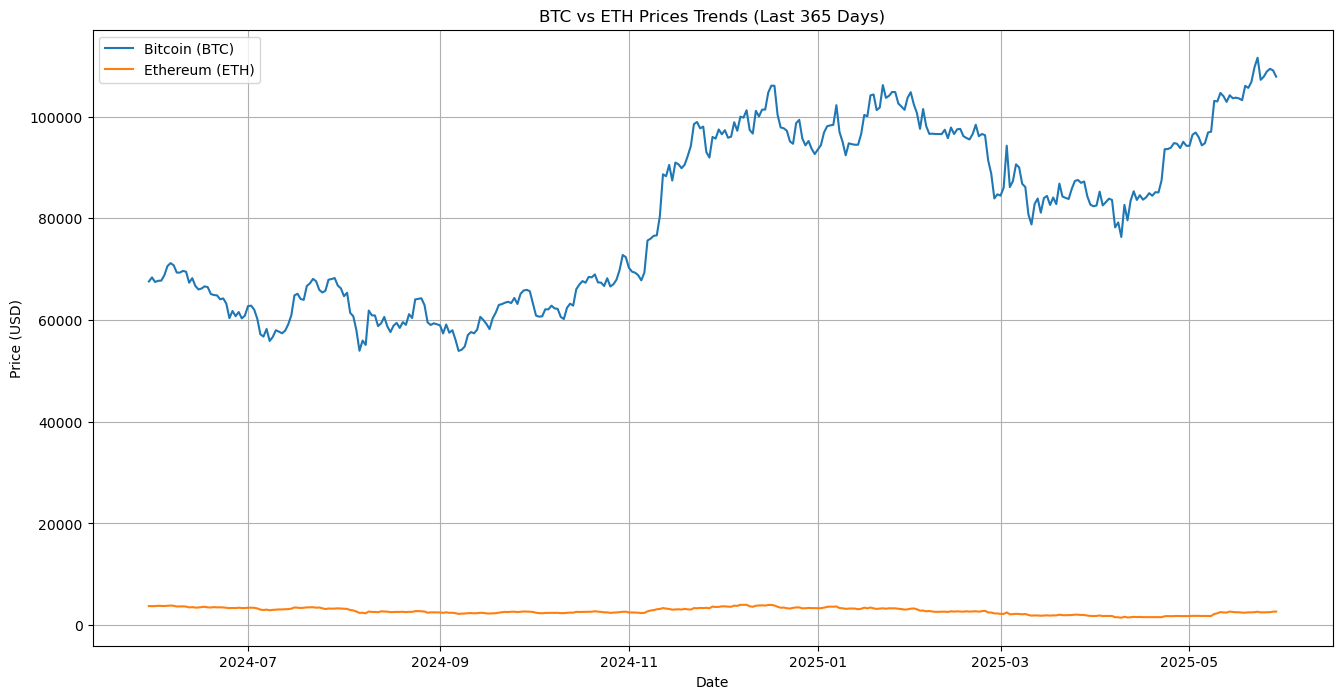

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(combined_df['date'], combined_df['prices_btc'], label='Bitcoin (BTC)')
plt.plot(combined_df['date'], combined_df['prices_eth'], label='Ethereum (ETH)')
plt.title('BTC vs ETH Prices Trends (Last 365 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

Correlation between BTC and ETH: 0.07


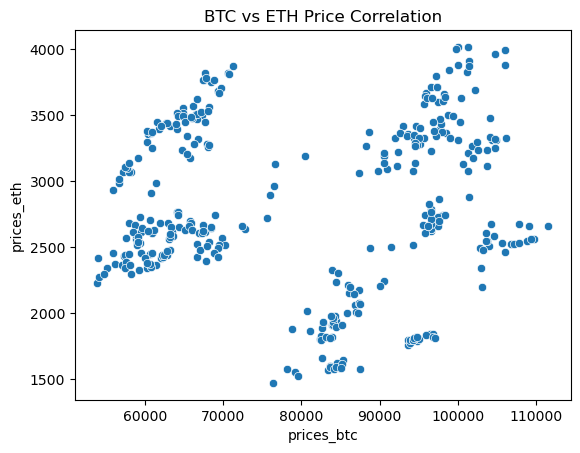

In [123]:
import seaborn as sns
correlation = combined_df[['prices_btc', 'prices_eth']].corr().iloc[0,1]
print(f"Correlation between BTC and ETH: {correlation:.2f}")

sns.scatterplot(data=combined_df, x='prices_btc', y='prices_eth')
plt.title('BTC vs ETH Price Correlation')
plt.show()

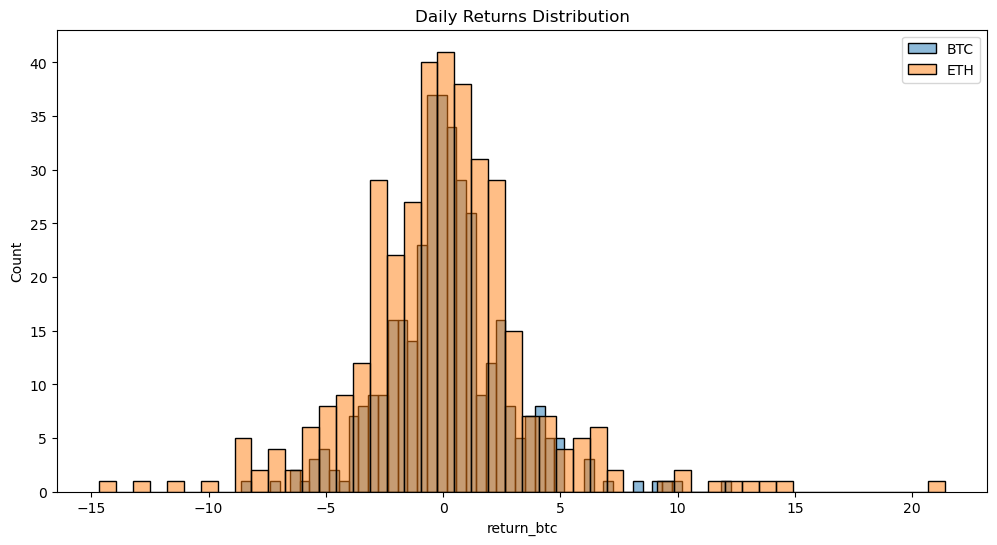

In [125]:
combined_df['return_btc'] = combined_df['prices_btc'].pct_change() * 100
combined_df['return_eth'] = combined_df['prices_eth'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.histplot(combined_df['return_btc'], bins=50, alpha=0.5, label='BTC')
sns.histplot(combined_df['return_eth'], bins=50, alpha=0.5, label='ETH')
plt.title('Daily Returns Distribution')
plt.legend()
plt.show()